In [3]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

In [4]:
sjer_plot_locations = gpd.read_file('data/spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_plot_centroids.shp')

In [5]:
# view  the top 6 lines of attribute table of data
sjer_plot_locations.head(6)


,Plot_ID,Point,northing,easting,plot_type,geometry
0,SJER1068,center,4111567.818,255852.376,trees,POINT (255852.376 4111567.818)
1,SJER112,center,4111298.971,257406.967,trees,POINT (257406.967 4111298.971)
2,SJER116,center,4110819.876,256838.760,grass,POINT (256838.760 4110819.876)
3,SJER117,center,4108752.026,256176.947,trees,POINT (256176.947 4108752.026)
4,SJER120,center,4110476.079,255968.372,grass,POINT (255968.372 4110476.079)
5,SJER128,center,4111388.570,257078.867,trees,POINT (257078.867 4111388.570)


In [6]:
type(sjer_plot_locations)

geopandas.geodataframe.GeoDataFrame

In [7]:
sjer_plot_locations.total_bounds

array([ 254738.618, 4107527.074,  258497.102, 4112167.778])

In [8]:
sjer_plot_locations.crs

{'init': 'epsg:32611'}

In [9]:
sjer_plot_locations.shape

(18, 6)

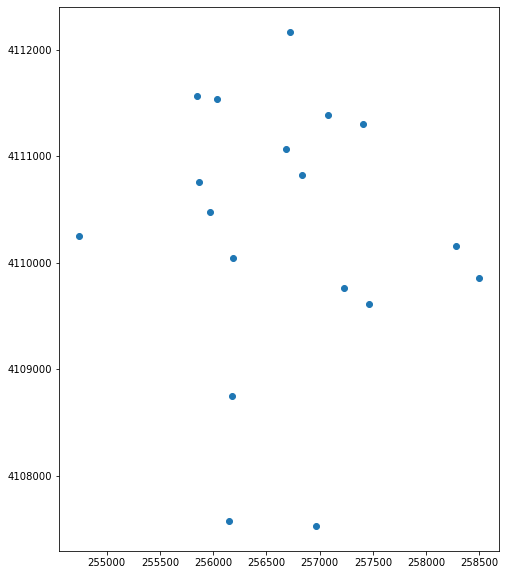

In [10]:
# plot the data using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))
sjer_plot_locations.plot(ax=ax)
plt.show()

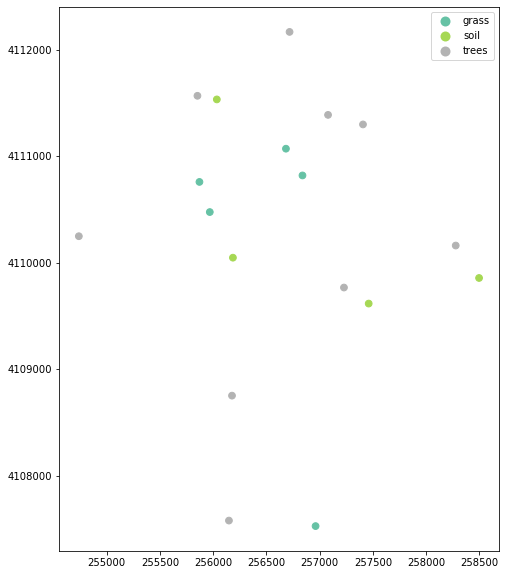

In [11]:
fig, ax = plt.subplots(figsize = (10,10))

# quickly plot the data adding a legend
sjer_plot_locations.plot(column='plot_type', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=45, 
                         cmap="Set2", ax=ax);

Text(0.5, 1, 'SJER Plot Locations\nMadera County, CA')

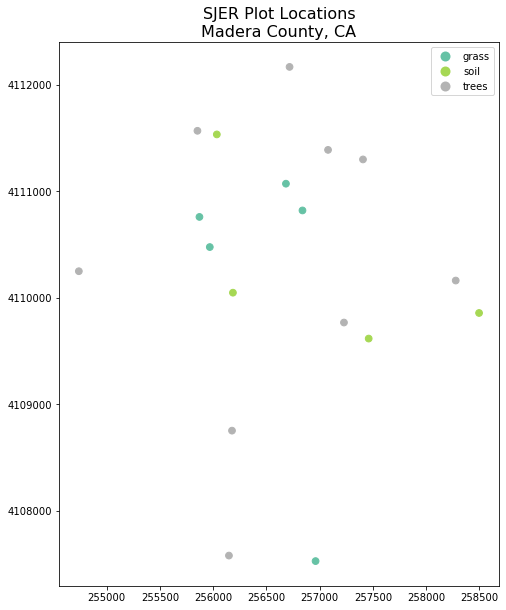

In [12]:
# Plot the data adjusting marker size and colors
# # 'col' sets point symbol color
# quickly plot the data adding a legend
ax = sjer_plot_locations.plot(column='plot_type', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,10),
                         markersize=45, 
                         cmap="Set2")
# add a title to the plot
ax.set_title('SJER Plot Locations\nMadera County, CA', fontsize=16)

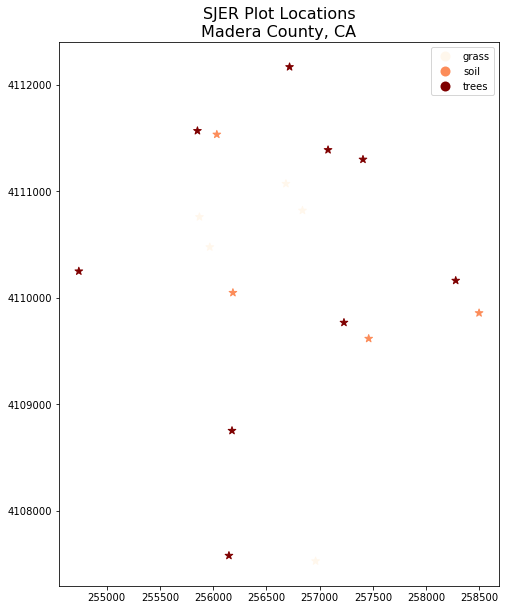

In [13]:
fig, ax = plt.subplots(figsize = (10,10))

sjer_plot_locations.plot(column='plot_type',
                              categorical=True,
                              legend=True,
                              marker='*', 
                              markersize=65, 
                              cmap='OrRd', ax=ax)
# add a title to the plot
ax.set_title('SJER Plot Locations\nMadera County, CA',
            fontsize=16)
plt.show()

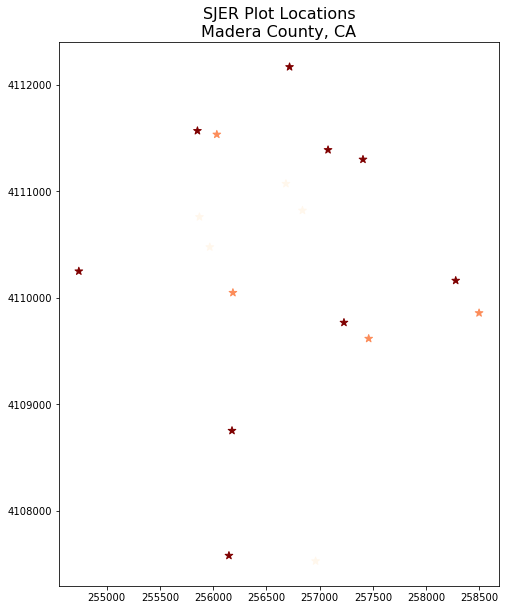

In [14]:
ax = sjer_plot_locations.plot(figsize=(10, 10), 
                              column='plot_type',
                              categorical=True,
                              marker='*', 
                              markersize=65, 
                              cmap='OrRd')
# add a title to the plot
ax.set_title('SJER Plot Locations\nMadera County, CA',
            fontsize = 16)
plt.show()

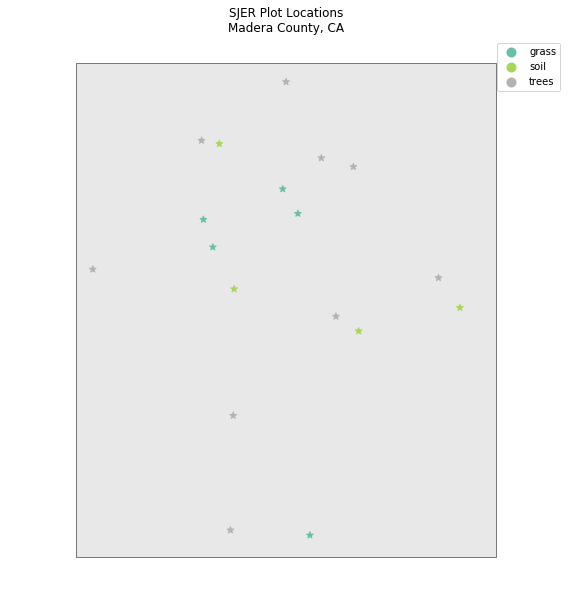

In [15]:
# import crop boundary
sjer_crop_extent = gpd.read_file("data/spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_crop.shp")
fig, ax = plt.subplots(figsize = (10, 10))

# first setup the plot using the crop_extent layer as the base layer 
sjer_crop_extent.plot(color='lightgrey',
                      edgecolor = 'black',
                      ax = ax,
                      alpha=.5)
# then add another layer using geopandas syntax .plot, and calling the ax variable as the axis argument
sjer_plot_locations.plot(ax=ax, 
                         column='plot_type',
                         categorical=True,
                         marker='*',
                         legend=True,
                         markersize=50, 
                         cmap='Set2')
# add a title to the plot
ax.set_title('SJER Plot Locations\nMadera County, CA')
ax.set_axis_off()
plt.axis('equal')
plt.show()

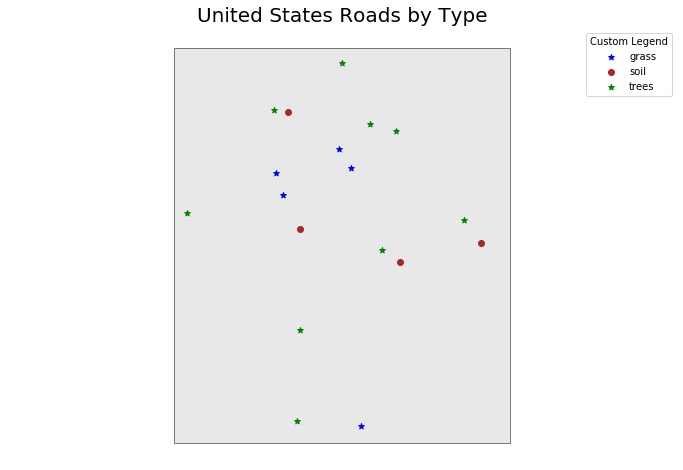

In [16]:
# make it a bit nicer using a dictionary to assign colors and line widths
plot_attrs = {'grass': ['blue', '*'], 
               'soil': ['brown','o'],
               'trees': ['green','*']}

# plot the data
fig, ax = plt.subplots(figsize  = (12, 8))

# first setup the plot using the crop_extent layer as the base layer 
sjer_crop_extent.plot(color='lightgrey',
                      edgecolor = 'black',
                      ax = ax,
                      alpha=.5)

for ctype, data in sjer_plot_locations.groupby('plot_type'):
    data.plot(color=plot_attrs[ctype][0], 
              label = ctype,
              ax = ax, 
             marker = plot_attrs[ctype][1],  
)

ax.legend(title="Custom Legend")
ax.set_title("United States Roads by Type", fontsize=20)
ax.set_axis_off()
plt.axis('equal')
plt.show()